In [1]:
import numpy as np
import DEWPython
from DEWPython import DEWModel as dm
import json

ImportError: cannot import name 'DEWModel' from 'DEWPython' (unknown location)

In [2]:
reaction = dm.DEW()

In [3]:
pt_arr = [[473,1473,1], [10,60,1]]

In [4]:
filename = 'FILENAME.json'

In [5]:
reaction.run(pt_arr, 
             min_inp =[], aq_inp = [['CO2,aq', '1'], ['H2,aq', '4']],g_inp = [], h2o_inp = 0,
             min_out = [],aq_out =[['METHANE,AQ','1']], g_out = [],h2o_out = 2,
             ptInp = 'Regular', rhoWat = 'Z&D 2005', forceBool = False, 
             dieEQ = 'Sverjensky', forceSC = False, WFEQ ='D&H 1978', dsV = False, 
             pdsV = False, DV = False, makePlots = False)

TypeError: run() got an unexpected keyword argument 'makePlots'

In [6]:
# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot
# currently installed theme will be used to
# set plot style if no arguments provided
#jtplot.style()
jtplot.style(ticks=True, grid=False, figsize=(8, 6))
from matplotlib import pyplot as plt
from matplotlib import colors

In [7]:
presskB = np.array([i*1e-3 for i in reaction.pressRed]) # converting P(bar) to P(kbar)
tempK = np.array(reaction.tempRed)
logK = np.array(reaction.pLogK)
delG = np.array(reaction.pDelG)

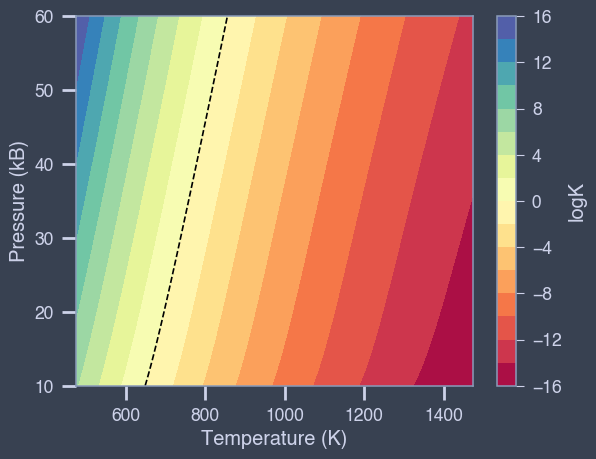

In [8]:
divnorm=colors.TwoSlopeNorm(vmin=np.min(logK), vcenter=0., vmax=np.max(logK))
cp = plt.contourf(tempK, presskB, logK, 20, cmap='Spectral', norm=divnorm)
plt.contour(tempK, presskB, logK, levels=[0.], linestyles='dashed', colors='black')
plt.colorbar(cp, label='logK')
plt.xlabel('Temperature (K)')
plt.ylabel('Pressure (kB)')
#plt.title('Inorganics - Alanine')
plt.tick_params(which='minor', length=6, width=2)
plt.tick_params(length=10, width=2)

In [9]:
dumpit = [tempK.tolist(), presskB.tolist(), logK.tolist(), delG.tolist()]
with open(filename, 'w') as outfile:
    json.dump(dumpit, outfile)

In [10]:
with open(filename) as json_file:
    data = json.load(json_file)
temp, press, LogK, DelG = data

In [11]:
temparr = np.array(temp)
pressarr = np.array(press)
logkarr = np.array(LogK)
delGarr = np.array(DelG)
temparr.shape, pressarr.shape, logkarr.shape, delGarr.shape

((1001,), (51,), (51, 1001), (51, 1001))